In [1]:
from time import time
import numpy as np
import astropy.units as u
import astropy.constants as c
import astropy.io.fits as pf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import gpr
import mcmc
import forAustin as fa

In [2]:
GP = gpr.GPR(
    '/data4/paper/fox/DES/austinFull.fits',
    500,
    sample=np.array([-0.2, 0, 0, 0.2]),
    verbose=False,
    eps=0,
    test_size=0.2,
    random_state=0)

In [3]:
def LML(GP, theta):
    GP.fit(theta)
    LML = GP.get_LML()
    return LML

In [4]:
var_s = 100
sigma_x = ((5 * u.arcmin).to(u.deg)).value
sigma_y = sigma_x
phi = (0 * u.deg).to(u.rad).value
theta0 = np.array([var_s, sigma_x, sigma_y, phi])
step_size = np.array([5, 5e-4, 5e-4, 1e-7])
names = np.array(['var_s', 'sigma_x', 'sigma_y', 'phi'])

In [5]:
estimator = mcmc.MCMC(LML, GP, theta0, step_size, names=names, seed=0)

In [6]:
%%time
# estimator.clear(step_size=step_size)
estimator.burn(10000)
estimator.run(100000)

CPU times: user 4h 25min 40s, sys: 18min 34s, total: 4h 44min 14s
Wall time: 23min 43s


0.38381
-1351.3910432844548


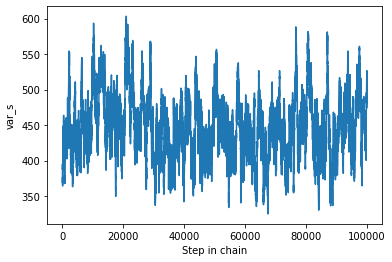

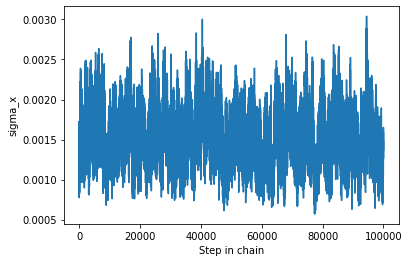

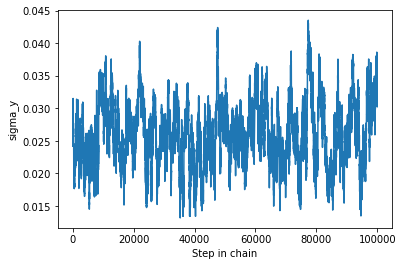

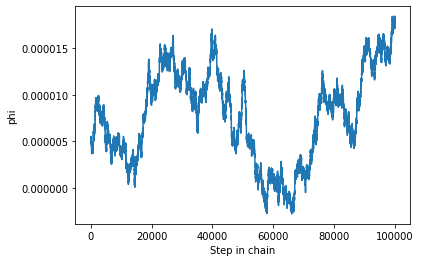

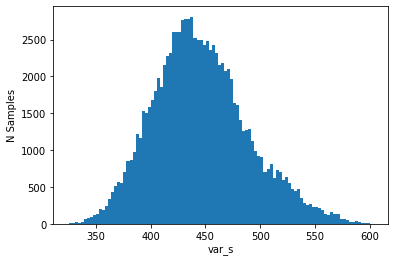

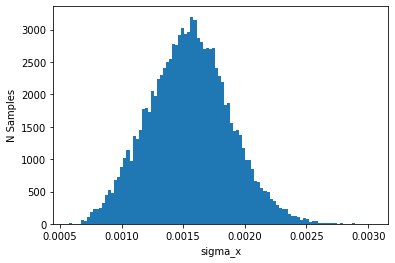

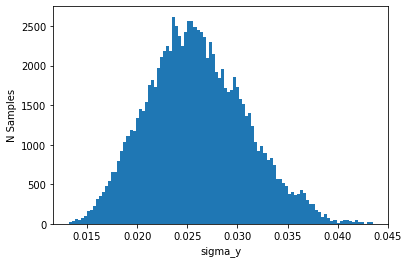

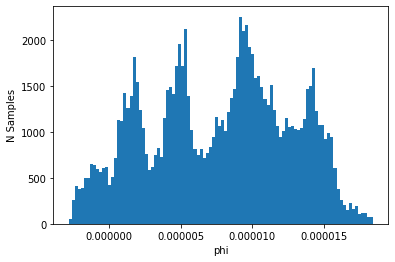

In [7]:
print(estimator.accept_fraction())
print(estimator.current_loglike)
estimator.plot_samples()
estimator.plot_hist()

In [8]:
mu = estimator.calculate_mean()
print((mu[1] * u.deg).to(u.arcmin), (mu[2] * u.deg).to(u.arcmin))
print(mu)

0.09296170606731109 arcmin 1.5564968436089317 arcmin
[4.45910799e+02 1.54936177e-03 2.59416141e-02 7.70753126e-06]


Current Log Marginal Likelihood: -113550.99841117521
Standard deviation of validation residuals: dx 19.853, dy 18.528
Standard deviation of Gaussian Process residuals: dx 15.748, dy 13.419
The ratio of validation residuals over GP residuals is: dx 1.261, dy 1.381


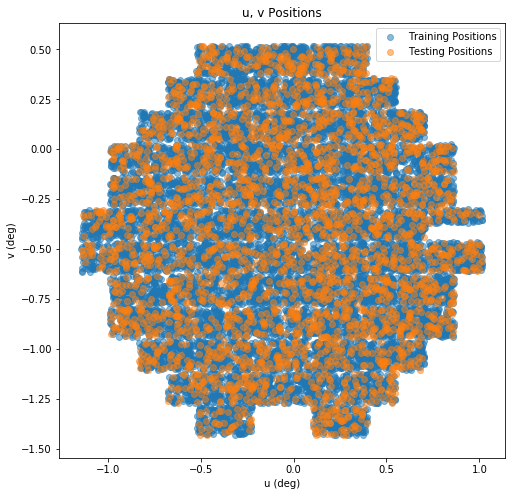

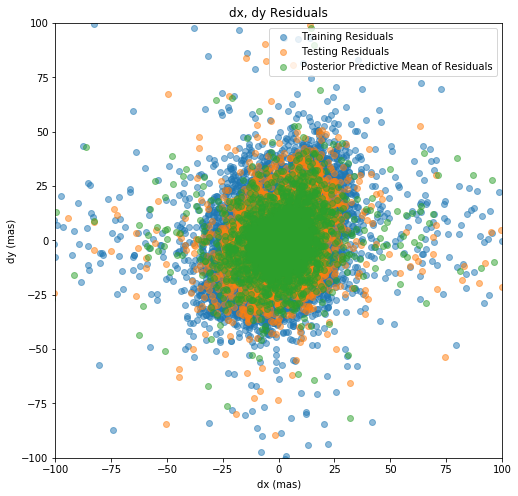

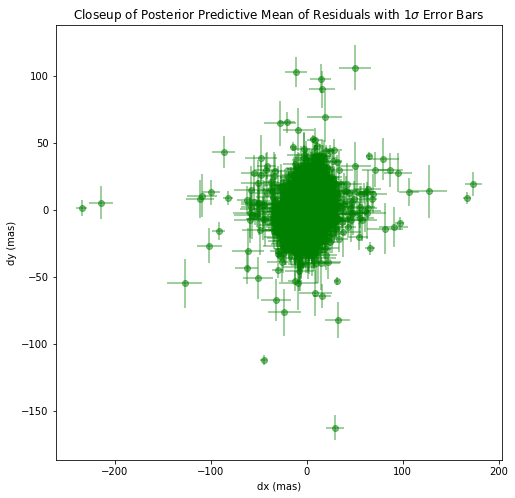

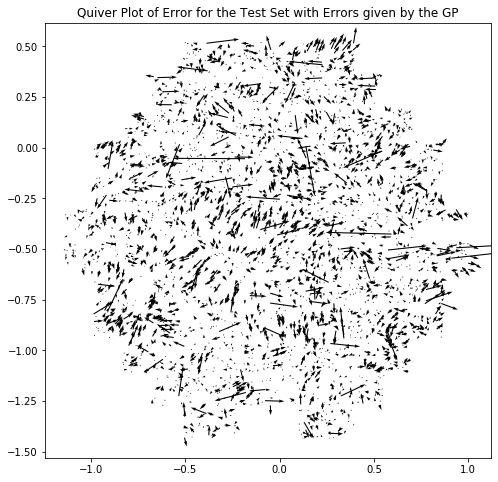

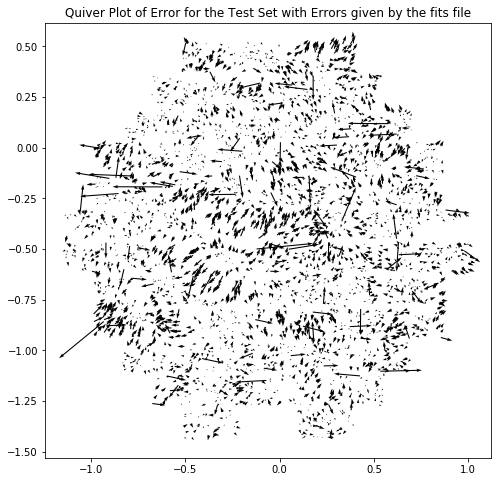

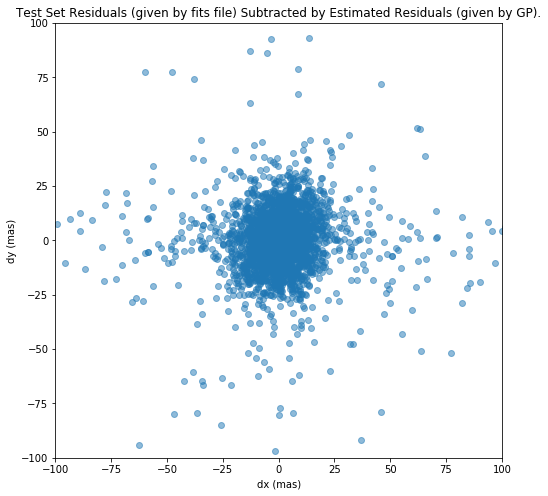

In [12]:
GP = gpr.GPR(
    '/data4/paper/fox/DES/austinFull.fits',
    500,
    sample=None,
    verbose=False,
    eps=0,
    test_size=0.2,
    random_state=0)
GP.fit(estimator.calculate_mean())
GP.summary()

In [14]:
GP.get_std??

Signature: GP.get_std()
Docstring: <no docstring>
Source:   
    def get_std(self):
        std0_dx = np.std(self.Ytest[:, 0])
        std0_dy = np.std(self.Ytest[:, 1])
        stdf_dx = np.std(self.fbar_s[:, 0])
        stdf_dy = np.std(self.fbar_s[:, 1])
        improvement_dx = std0_dx / stdf_dx
        improvement_dy = std0_dy / stdf_dy
        print(f"Standard deviation of validation residuals: dx {np.round(std0_dx, 3)}, dy {np.round(std0_dy, 3)}")
        print(f"Standard deviation of Gaussian Process residuals: dx {np.round(stdf_dx, 3)}, dy {np.round(stdf_dy, 3)}")
        print(f"The ratio of validation residuals over GP residuals is: dx {np.round(improvement_dx, 3)}, dy {np.round(improvement_dy, 3)}")
File:      ~/DESworkspace/gpr.py
Type:      method


In [15]:
np.std(GP.Ytest[:, 0]), np.std(GP.Ytest[:, 1])

(19.853463123056812, 18.527835409149485)

In [16]:
su = GP.Ytest[:, 0] - GP.fbar_s[:, 0]
sv = GP.Ytest[:, 1] - GP.fbar_s[:, 1]

In [17]:
np.std(su), np.std(sv)

(21.942452920482747, 17.275386525082272)